In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import scipy
import numpy as np
import seaborn as sns
from functools import reduce

from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline


INFO:Please install tensorboardX: pip install tensorboardX

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


/bin/sh: line 1: sox: command not found
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [22]:
import matplotlib.pyplot as plt

def ladder_plot(dict1, dict2, color_dict, left_label="Left", right_label="Right"):
    keys = list(dict1.keys())
    
    fig, ax = plt.subplots(figsize=(6, len(keys) * 0.5))

    for key in keys:
        y_left = dict1[key]
        y_right = dict2.get(key, y_left)  # fallback to y_left if key missing in dict2
        color = color_dict.get(key, "gray")  # fallback to gray if no color provided

        ax.plot([0, 1], [y_left, y_right], color=color, lw=2)
        ax.text(-0.05, y_left, key, va='center', ha='right')
        ax.text(1.05, y_right, key, va='center', ha='left')

    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels([left_label, right_label])
    # ax.set_yticks([])
    ax.set_title("Ladder Plot")
    plt.tight_layout()
    return fig, ax

def lighten_color(rgb, amount=0.5):
    """
    Lightens the given RGB color by mixing it with white.
    
    Parameters:
    - rgb: tuple of (r, g, b), each in 0–1 range.
    - amount: float in [0, 1], where 0 means no change and 1 means full white.

    Returns:
    - Lightened RGB tuple
    """
    return tuple(1 - (1 - c) * (1 - amount) for c in rgb)



INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Ext

Text(0.5, 1.0, 'mVocs')

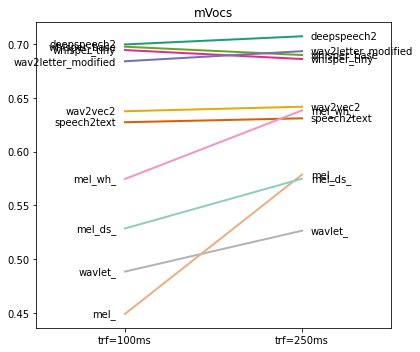

In [28]:
model_names = [
    'whisper_tiny',
    'whisper_base',
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
    'deepspeech2',
    ]
strf_versions = {
    'wavlet': 'wavlet_',
    'speech2text': 'mel_',
    'deepspeech2': 'mel_ds_',
    'whisper_tiny': 'mel_wh_',
}
lags = [50, 200]

threshold = 0.5
bin_width = 50
area = 'all'
mVocs = True
model_peaks = {lag: {} for lag in lags}
color_dict = {}
for model_name in model_names:
    color_dict[model_name] = PlotterUtils.get_model_specific_color(model_name)
    for lag in lags:
        identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
        corr_obj = Correlations(model_name+'_'+identifier)
        data_dist_trained = corr_obj.get_corr_all_layers_for_bin_width(
                neural_area=area, bin_width=bin_width, delay=0,
                threshold=threshold, normalized=True, mVocs=mVocs,
            )

        layer_medians = [np.median(dist) for dist in data_dist_trained.values()]
        model_peaks[lag][model_name] = np.max(layer_medians)

for strf_version, substr in strf_versions.items():
    col = PlotterUtils.get_model_specific_color(strf_version)
    color_dict[substr] = lighten_color(col, 0.5)
    for lag in lags:
        identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
        corr_obj = STRFCorrelations('STRF_freqs80_'+strf_versions[strf_version]+identifier)
        data_dist = corr_obj.get_correlations_for_bin_width(
                neural_area=area, bin_width=bin_width, delay=0,
                threshold=threshold, normalized=True, mVocs=mVocs,
            )

        # layer_medians = [np.median(dist) for dist in data_dist_trained.values()]
        model_peaks[lag][substr] = np.median(data_dist)

fig, ax = ladder_plot(model_peaks[50], model_peaks[200], color_dict, 
            left_label='trf=100ms', right_label='trf=250ms')
ax.set_title(f"mVocs" if mVocs else "TIMIT")

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std 

Text(0.5, 1.0, 'TIMIT')

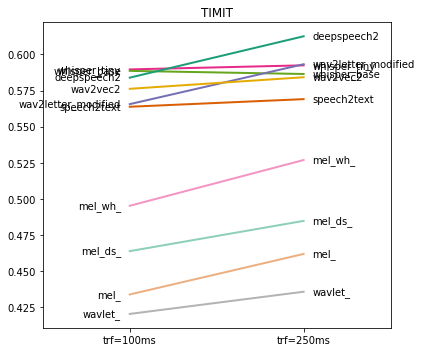

In [29]:
model_names = [
    'whisper_tiny',
    'whisper_base',
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
    'deepspeech2',
    ]
strf_versions = {
    'wavlet': 'wavlet_',
    'speech2text': 'mel_',
    'deepspeech2': 'mel_ds_',
    'whisper_tiny': 'mel_wh_',
}
lags = [50, 200]
threshold = 0.5
bin_width = 50
area = 'all'
mVocs = False
model_peaks = {lag: {} for lag in lags}
color_dict = {}
for model_name in model_names:
    color_dict[model_name] = PlotterUtils.get_model_specific_color(model_name)
    for lag in lags:
        identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
        corr_obj = Correlations(model_name+'_'+identifier)
        data_dist_trained = corr_obj.get_corr_all_layers_for_bin_width(
                neural_area=area, bin_width=bin_width, delay=0,
                threshold=threshold, normalized=True, mVocs=mVocs,
            )

        layer_medians = [np.median(dist) for dist in data_dist_trained.values()]
        model_peaks[lag][model_name] = np.max(layer_medians)

for strf_version, substr in strf_versions.items():
    col = PlotterUtils.get_model_specific_color(strf_version)
    color_dict[substr] = lighten_color(col, 0.5)
    for lag in lags:
        identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
        corr_obj = STRFCorrelations('STRF_freqs80_'+strf_versions[strf_version]+identifier)
        data_dist = corr_obj.get_correlations_for_bin_width(
                neural_area=area, bin_width=bin_width, delay=0,
                threshold=threshold, normalized=True, mVocs=mVocs,
            )

        # layer_medians = [np.median(dist) for dist in data_dist_trained.values()]
        model_peaks[lag][substr] = np.median(data_dist)

fig, ax = ladder_plot(model_peaks[50], model_peaks[200], color_dict, 
            left_label='trf=100ms', right_label='trf=250ms')
ax.set_title(f"mVocs" if mVocs else "TIMIT")

### padded deepspeech2 - before regression improvement

INFO:Plotting trained and shuffled distributions for deepspeech2
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.4930245771528729, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9470312325152992, occurs at x_coordinate: 0
INFO:Peak corr (median): 0.5208154296768508, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9680203386914236, occurs at x_coordinate: 6
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.4831611470654496, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.7458032609067884, occurs at x_coordinate: 0


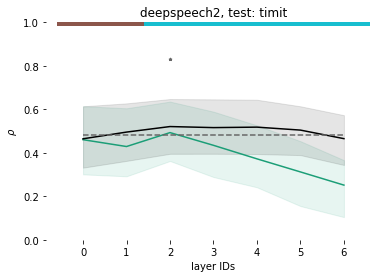

In [5]:
model_name = 'deepspeech2'
lag = 1   #100, 150
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_padded_features'
untrained_identifiers = [f'ucsf_reset_timit_trf_lags{lag}_bw50_padded_features']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_wh_ucsf_timit_trf_lags300_bw50_naplib_matched"
bin_width = 50
area = 'all'
threshold = 0.5
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
save_tikz=False
dists = RegPlotter.plot_all_layers_trained_and_shuffled(
        model_name=model_name,
        bin_width=bin_width,
        area=area,
        normalized=normalized,
        threshold=threshold,
        mVocs=mVocs,
        save_tikz=save_tikz,
        trained_identifier=trained_identifier,
        untrained_identifiers=untrained_identifiers,
        baseline_identifier=baseline_identifier,
        plot_baseline=True,
        indicate_significance=True,
        display_dotted_lines=False,
        )

INFO:Plotting trained and shuffled distributions for deepspeech2
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5578390831766007, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.964278401234914, occurs at x_coordinate: 1
INFO:Peak corr (median): 0.5385852192988718, occurs at x_coordinate: 3
INFO:Peak corr (max): 0.9726200970935044, occurs at x_coordinate: 5
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.4831611470654496, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.7458032609067884, occurs at x_coordinate: 0


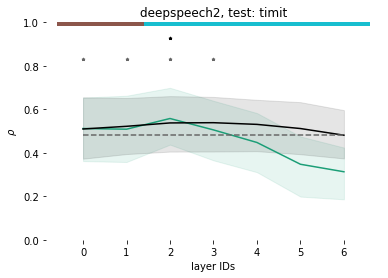

In [6]:
model_name = 'deepspeech2'
lag = 50   #100, 150
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_padded_features'
untrained_identifiers = [f'ucsf_reset_timit_trf_lags{lag}_bw50_padded_features']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_wh_ucsf_timit_trf_lags300_bw50_naplib_matched"
bin_width = 50
area = 'all'
threshold = 0.5
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
save_tikz=False
dists = RegPlotter.plot_all_layers_trained_and_shuffled(
        model_name=model_name,
        bin_width=bin_width,
        area=area,
        normalized=normalized,
        threshold=threshold,
        mVocs=mVocs,
        save_tikz=save_tikz,
        trained_identifier=trained_identifier,
        untrained_identifiers=untrained_identifiers,
        baseline_identifier=baseline_identifier,
        plot_baseline=True,
        indicate_significance=True,
        display_dotted_lines=False,
        )

INFO:Plotting trained and shuffled distributions for deepspeech2
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5922217090441262, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9646961858724388, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.5416638619056213, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9727217285405602, occurs at x_coordinate: 3
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.4831611470654496, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.7458032609067884, occurs at x_coordinate: 0


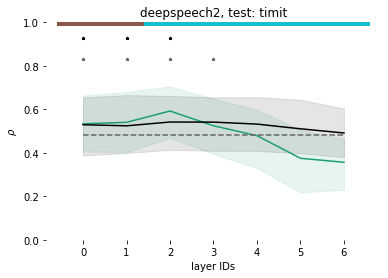

In [7]:
model_name = 'deepspeech2'
lag = 100   #100, 150
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_padded_features'
untrained_identifiers = [f'ucsf_reset_timit_trf_lags{lag}_bw50_padded_features']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_wh_ucsf_timit_trf_lags300_bw50_naplib_matched"
bin_width = 50
area = 'all'
threshold = 0.5
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
save_tikz=False
dists = RegPlotter.plot_all_layers_trained_and_shuffled(
        model_name=model_name,
        bin_width=bin_width,
        area=area,
        normalized=normalized,
        threshold=threshold,
        mVocs=mVocs,
        save_tikz=save_tikz,
        trained_identifier=trained_identifier,
        untrained_identifiers=untrained_identifiers,
        baseline_identifier=baseline_identifier,
        plot_baseline=True,
        indicate_significance=True,
        display_dotted_lines=False,
        )

INFO:Plotting trained and shuffled distributions for deepspeech2
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5972086990060135, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9657862899430308, occurs at x_coordinate: 1
INFO:Peak corr (median): 0.5462230850964229, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9702827305085288, occurs at x_coordinate: 4
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.4831611470654496, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.7458032609067884, occurs at x_coordinate: 0


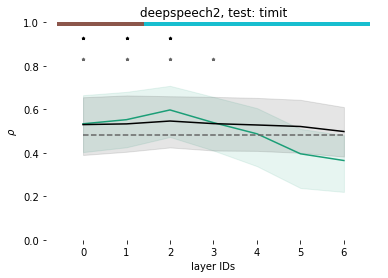

In [8]:
model_name = 'deepspeech2'
lag = 150   #100, 150
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_padded_features'
untrained_identifiers = [f'ucsf_reset_timit_trf_lags{lag}_bw50_padded_features']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_wh_ucsf_timit_trf_lags300_bw50_naplib_matched"
bin_width = 50
area = 'all'
threshold = 0.5
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
save_tikz=False
dists = RegPlotter.plot_all_layers_trained_and_shuffled(
        model_name=model_name,
        bin_width=bin_width,
        area=area,
        normalized=normalized,
        threshold=threshold,
        mVocs=mVocs,
        save_tikz=save_tikz,
        trained_identifier=trained_identifier,
        untrained_identifiers=untrained_identifiers,
        baseline_identifier=baseline_identifier,
        plot_baseline=True,
        indicate_significance=True,
        display_dotted_lines=False,
        )